# Unlocking Real Estate Value: A Comprehensive EDA of House Prices 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
import seaborn as sns
import scipy.stats as stats
wr.filterwarnings('ignore')

**Phase 1: Data Inspection & Structural Audit**

In [2]:
df = pd.read_csv("D:/LD/DATA/Data_Input/house-prices-advanced-regression-techniques/train.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Variable Categorization**

In [4]:
# Numerical features
numerical_features = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Display
print("Numerical Features:", numerical_features )
print("Numerical Features:", categorical_features )

# Len inspection
print("Total Numerial:", len(numerical_features))
print("Total Categorical:", len(categorical_features))



Numerical Features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Numerical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fireplace

In [5]:
# Target Variable
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## Univariate Analysis of Target Variable (SalePrice)

Perform a univariate analysis on SalePrice

**Basic Statistics**

In [6]:
print("Mean:", df['SalePrice'].mean())
print("Median:", df['SalePrice'].median())
print("Skewness:", df['SalePrice'].skew())
print("Kurtosis:", df['SalePrice'].kurt())

Mean: 180921.19589041095
Median: 163000.0
Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


`SalePrice:` Skewness value > 0, so its right skewed or positive skewed

`Task:` Plot a histogram and a Q-Q plot. Does it follow a normal distribution? If not, apply a log 
transformation. 

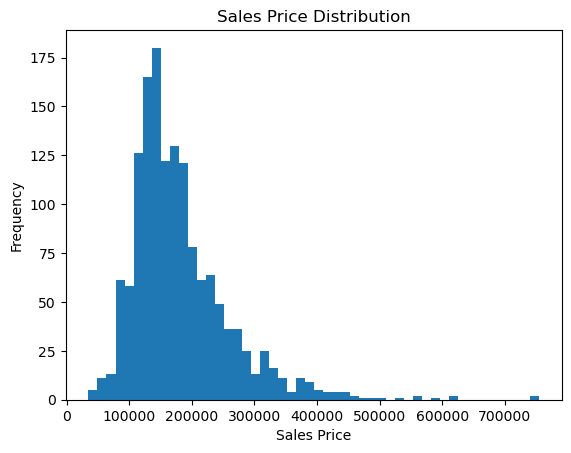

In [7]:
# Histogram
plt.figure()
plt.hist(df['SalePrice'], bins=50)
plt.title("Sales Price Distribution")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.show()

**Notes**
- Long right tail/ skewed 
- its not normal distribution

Q-Q Plot (Normality Check)

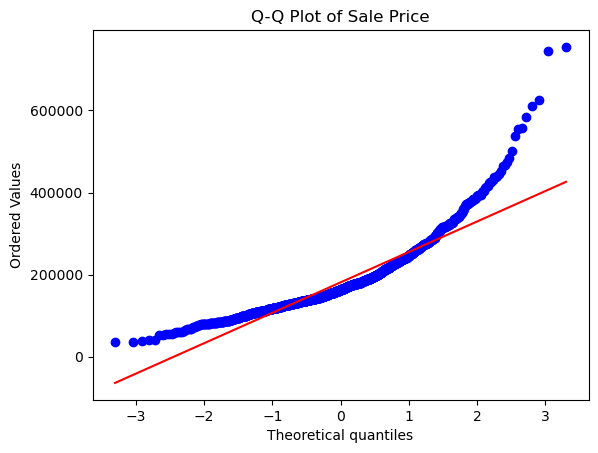

In [8]:
plt.figure()
stats.probplot(df['SalePrice'], dist='norm', plot=plt)
plt.title("Q-Q Plot of Sale Price")
plt.show()

**Interpretation**
- Deviation in upper tail, its not normal Distribution, so we can apply log transformation over this for normality


**Apply Log Transformation**

In [9]:
# Apply log transformation to make normal distribution

df['SalePrice'] = np.log1p(df['SalePrice'])

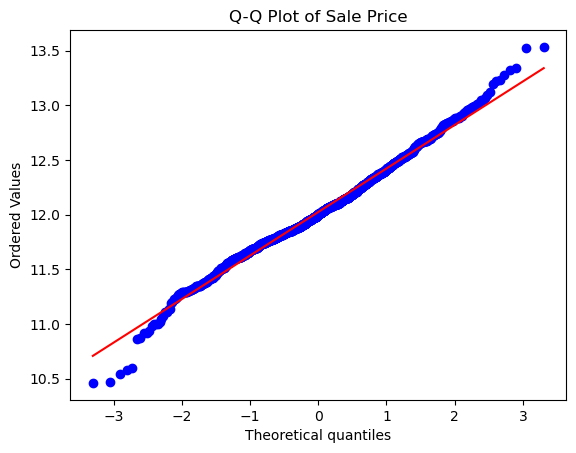

In [10]:
# Normality check after log Transformation
stats.probplot(df['SalePrice'], dist='norm', plot=plt)
plt.title("Q-Q Plot of Sale Price")
plt.show()

## Phase 2: The "Cleaning" Ritual 

**2.1 Finding IQR**

In [11]:
# Calculate quartiles
Q1 = df['SalePrice'].quantile(.25)
Q3 = df['SalePrice'].quantile(.75)

# Calculate quartiles
IQR = Q3 - Q1

# Interquartile Range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Show
print("Q1:", Q1)
print("Q3:", Q3)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Q1: 11.775105041501487
Q3: 12.273735966890268
Lower Bound: 11.027158653418315
Upper Bound: 13.02168235497344


Filter Dataset

In [12]:
# Clean Data after removing outliers
df_clean = df[(df['SalePrice'] >= lower_bound) &
              (df['SalePrice'] <= upper_bound)
]

print('Origional Shape:', df.shape)
print('After Removing Outliers:', df_clean.shape)

Origional Shape: (1460, 81)
After Removing Outliers: (1432, 81)


Boxplot Before & After

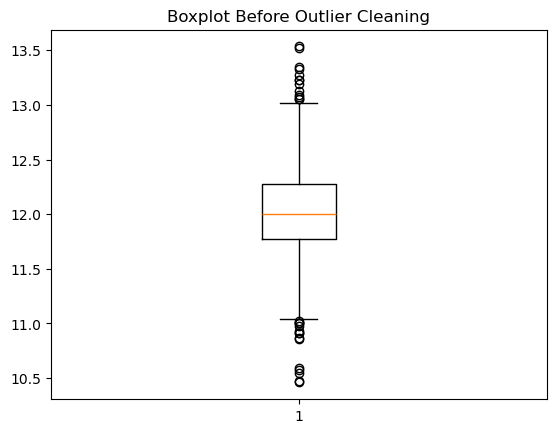

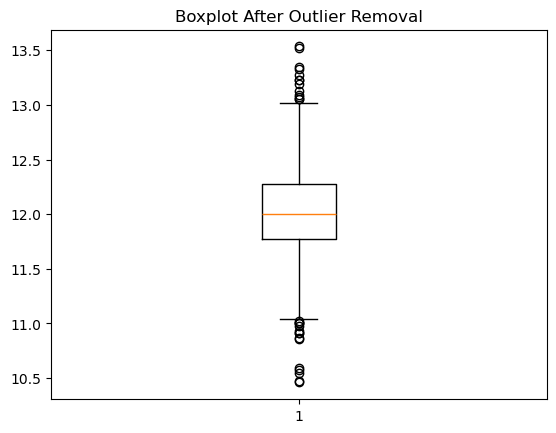

In [13]:
# Before Cleaning
plt.boxplot(df['SalePrice'])
plt.title("Boxplot Before Outlier Cleaning")
plt.show()

# Boxplot After Outlier Removal
plt.boxplot(df['SalePrice'])
plt.title("Boxplot After Outlier Removal")
plt.show()


# Phase 3: Multivariate Analysis & Visualization 

**Correlation Matrix: Generate a heatmap of the correlation matrix.** 

- Task: Identify the top 10 features most strongly correlated with SalePrice (e.g., OverallQual, 
GrLivArea, GarageCars). 

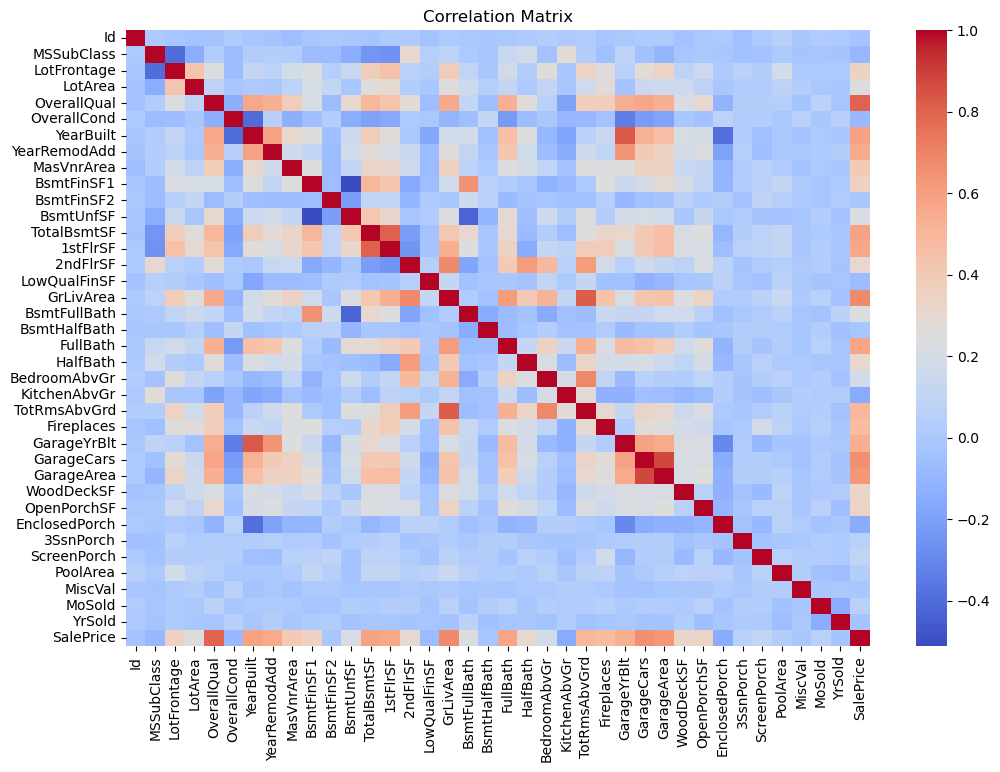

In [14]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df_clean.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Top 10 Features Correlated With SalePrice

In [15]:
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False)[1:11]
print(top_corr)

OverallQual     0.801105
GrLivArea       0.677547
GarageCars      0.663129
GarageArea      0.630883
YearBuilt       0.588743
TotalBsmtSF     0.586729
FullBath        0.578399
1stFlrSF        0.566800
YearRemodAdd    0.556869
GarageYrBlt     0.535947
Name: SalePrice, dtype: float64


Categorical Deep Dive – OverallQual

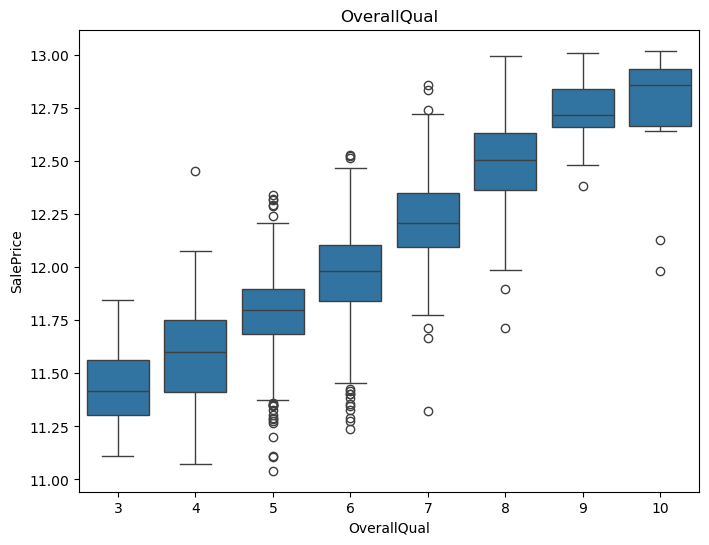

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x="OverallQual", y='SalePrice', data=df_clean)
plt.title("OverallQual")
plt.show()

- As quality increases, meadian price increases!

### Neighborhood Analysis

Average price per neighborhood

In [17]:
df_clean.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
df_clean['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1432, dtype: object

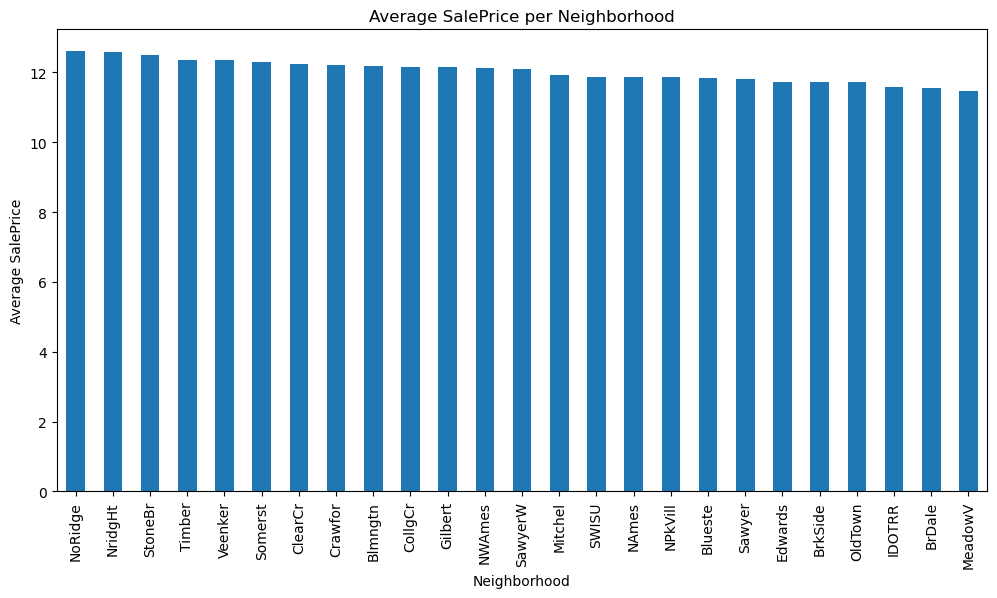

In [21]:
neigh_price = df_clean.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
neigh_price.plot(kind='bar')
plt.title("Average SalePrice per Neighborhood")
plt.ylabel('Average SalePrice')
plt.show()

These are the "Beverly Hills" of this dataset

# Phase 4: Final Insights & Reporting

- Top 3 Drivers: What are the three most important factors in determining a house's price? 
- Anomaly Report: Which features had the most missing data, and how might that affect a future 
model? 
- Visual Summary: Include your 4 most impactful charts.

**Top 3 Drivers of House Price**

Based on correlation and visualization:

- OverallQual: Strongest predictor. Quality rating directly impacts price.
- GrLivArea: Larger above-ground living space → higher price
- GarageCars: More garage capacity, higher propertly value


**Anomaly / Missing Data Report**

In [23]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing/len(df))*100

missing_report = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_%': missing_percent
})

print(missing_report.head(10))

             Missing_Count  Missing_%
PoolQC                1453  99.520548
MiscFeature           1406  96.301370
Alley                 1369  93.767123
Fence                 1179  80.753425
MasVnrType             872  59.726027
FireplaceQu            690  47.260274
LotFrontage            259  17.739726
GarageYrBlt             81   5.547945
GarageCond              81   5.547945
GarageType              81   5.547945


They might affect future model/Impact:

- Could bias model
- Could bias model
- Need imputation


#### Visual Summary (4 Most Impactful Charts)

- Histogram + Q-Q Plot (Distribution)
- IQR Boxplot (Outlier removal)
- Correlation Heatmap
- OverallQual vs SalePrice Boxplot

Which Provides:
- Distribution insight
- Distribution insight
- Feature importance
- Business impact